## Project3: Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape
#Data has 294478 rows

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.nunique()
#Data has 290584 unique users

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
df.query("converted == 1").count()[0]/df.shape[0]
#The proportion of users converted is 11.97%

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]
#There has 3893 rows of new_page and treatment don't line up

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().values.any()
#The result shows there is no missing values

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
dfc = df.copy()
#Make a copy of df

In [9]:
df_1 = dfc[dfc['group'] == 'treatment']
df_2 = df_1[df_1['landing_page'] == 'new_page']
#Create a dataframe that only has treatment and new_page

In [10]:
df_3 = df[df['group'] == 'control']
df_4 = df_3[df_3['landing_page'] == 'old_page']
#Create a dataframe that only has control and old_page

In [11]:
df2 = df_2.merge(df_4, how='outer')
#Merge df_3 and df_4 to df2

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2['user_id'].nunique()
#Number of unique ids in df2 is 290584

290584

In [14]:
sum(df2['user_id'].duplicated())
#There is 1 duplicate in df2

1

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2.loc[df2['user_id'].duplicated(keep=False), :]
#Find out the duplicated rows

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [16]:
#Two rows has dfferent timestamp and other columns are the same 

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2 = df2.drop(df2[(df2.user_id == 773192) & (df2['timestamp'] == '2017-01-14 02:55:59.590927')].index)
#Remove the last duplicated row
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
df2.query("converted == 1").count()[0]/df2.shape[0]
#The probability of an individual converting regardless of the page they receive is 11.96%

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
df2.query("converted == 1 and group == 'control'").count()[0]/df2.query("group == 'control'").count()[0]
#The probability of an individual converting in the control group is 12.04%

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
df2.query("converted == 1 and group == 'treatment'").count()[0]/df2.query("group == 'treatment'").count()[0]
#The probability of an individual converting in the treatment group is 11.88%

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
df2.query("group == 'treatment'").count()[0]/df2.shape[0]
#The probability that an individual received the new page is 50%

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Compare the numbers above, each group has the same population.**

**The probability of an individual converting regardless of the page they receive is 11.96%**

**There is 12.04% people of 'control' group have converted.**

**There is 11.88% people of 'treatment' group have converted.**

**The probablity users converted in both control and treatment group are pretty similar to each other.**

**Therefore, there is no evidence shows which page has better performance.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null hypotheses**                **$H_0:$** **$p_{new}$** - **$p_{old}$** **$\leq$** **0**

**Alternative hypotheses**    **$H_1:$** **$p_{new}$** - **$p_{old}$** **$>$** **0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
p_new = df2.query('converted == 1')['user_id'].nunique()/df2['user_id'].nunique()
p_new
#The convert rate for p_new under the null is 0.1196

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
p_old = df2.query('converted == 1')['user_id'].nunique()/df2['user_id'].nunique()
p_old
#The convert rate for p_old under the null is 0.1196

0.11959708724499628

c. What is $n_{new}$?

In [24]:
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()
n_new
#The n_new is 145310

145310

d. What is $n_{old}$?

In [25]:
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
n_old
#The n_old is 145274

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
#Simulate n_new transactions with a convert rate of p_old under the null
new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
new_page_converted 

array([1, 1, 1, ..., 0, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
#Simulate n_old transactions with a convert rate of p_old under the null
old_page_converted = np.random.choice([0,1],n_old, p=(p_old,1-p_old))
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
#Compute the probablity of new page converted rate
new_page_converted.mean()

0.8806757965728442

In [29]:
#Compute the probablity of old page converted rate
old_page_converted.mean()


0.8804672549802443

In [30]:
#Compute p_new - p_old values
new_page_converted.mean() - old_page_converted.mean()

0.00020854159259997562

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [31]:
#Create sampling distribution with boostrapping
p_diffs = []
size = df2.shape[0]
for _ in range(10000):
    samp = df2.sample(size, replace = True)
    new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
    old_page_converted = np.random.choice([0,1],n_old, p=(p_old,1-p_old))
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

In [32]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([2.700e+01, 1.830e+02, 9.090e+02, 2.159e+03, 3.024e+03, 2.390e+03,
        1.045e+03, 2.320e+02, 3.000e+01, 1.000e+00]),
 array([-0.00434066, -0.00338607, -0.00243147, -0.00147687, -0.00052227,
         0.00043232,  0.00138692,  0.00234152,  0.00329611,  0.00425071,
         0.00520531]),
 <a list of 10 Patch objects>)

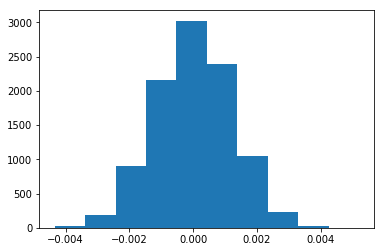

In [33]:
#Plot a histogram of the p_diffs
plt.hist(p_diffs)

In [34]:
# Create number of users with all new_page users and all old_page users
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()

In [35]:
# Compute actual converted rate
actual_cvt_new = convert_new/n_new
actual_cvt_old = convert_old/n_old

In [36]:
# Compute observed difference in converted rate 
obs_diff = actual_cvt_new - actual_cvt_old 
obs_diff

-0.0015782389853555567

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

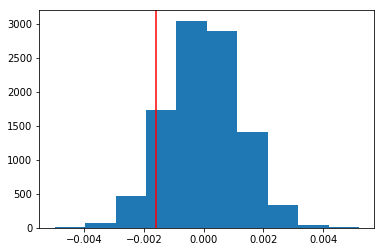

In [38]:
#Plot Null distribution
plt.hist(null_vals)
#Plot vertical line for observed statistic
plt.axvline(x=obs_diff,color ='red')

In [39]:
#Compute proportion of the p_diffs are greater than the actual difference observed in ab_data.csv
(null_vals > obs_diff).mean()

0.904

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**P-Value: The probability of observing our statistic or a more extreme statistic from the null hypothesis.**

**Type I error rate ia 5%, $p_{old}$ > $ \alpha $. That means we fail to reject the null.**
**So, the old page has higher probablity of convert rate than new page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [40]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [41]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_old,convert_new]),
                                              np.array([n_old,n_new]))

z_score, p_value

(1.3109241984234394, 0.18988337448195103)

In [42]:
from scipy.stats import norm

norm.cdf(z_score)
# Tells us how significant our z-score is

0.9050583127590245

In [43]:
norm.ppf(1-(0.05/2))
# Tells us what our critical value at 95% confidence is

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Since the z-score of 1.31 does not exceed the critical value of 1.96, we fail to reject the null hypothesis.**

**The old page users has a higher converted rate than new page users.**

**So, the converted rate for new page and old page have no difference. This result is the same as parts J. and K. result.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression, because the fact that response variable is categorical variable.** 

**Predictor variables that are continuous.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [44]:
#create a intercept column
df2['intercept'] = 1

In [45]:
#create a dummy variable column
df2= df2.join(pd.get_dummies(df2['landing_page']))

In [58]:
df2= df2.join(pd.get_dummies(df2['group']))
df2['ab_page'] = df2['treatment']
df2 = df2.drop(columns=['control', 'treatment'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [59]:
#Create Logit regression model for conveted variable ab_page, use control as baseline
lo = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
result = lo.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [60]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Jan 2019   Pseudo R-squ.:               8.077e-06
Time:                        02:26:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated with ab_page is 0.190.**

**The null in above questions is  that there is no difference between the treatment and control group.**

**Alternative hypotheses is that there is difference between the treatment and control group.**

**Part II is the old page is better than the new page.**

**Cmpared to above questions,they have different varibale and factor for the result.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Other factor can be the time. We can make time as categorical variable that includes "Morning, afternoon, and evening", or "weekday and weekend".**

**We can add higher order term to help predict the result better.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [61]:
#Read countries.csv
ct = pd.read_csv('countries.csv')
ct.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [62]:
#Merge ab dataset with country dataset
df3 = df2.merge(ct, on ='user_id', how='left')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0,1,CA
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0,1,UK
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,0,1,CA


In [63]:
#Check country column's unique
ct['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [64]:
#Drop US column
df3[['CA','UK','US']] = pd.get_dummies(df3['country'])
df3 = df3.drop(df3['US'])

In [65]:
#Create intercept variable
df3['intercept'] = 1

#Create Logit regression model for conveted and country, and use US and old page as baseline
lo1 = sm.Logit(df3['converted'], df3[['intercept','new_page','UK','CA']])
result1 = lo1.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290582
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            3
Date:                Fri, 11 Jan 2019   Pseudo R-squ.:               2.322e-05
Time:                        02:27:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1763
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
new_page      -0.0149      0.011     -1.306      0.192      -0.037       0.007
UK             0.0099      0.013      0.742      0.458      -0.016       0.036
CA            -0.0408      0.027     -1.516      0.129      -0.093       0.012
==============================================================================
"""

In [66]:
1/np.exp(-0.0149),np.exp(0.0099),np.exp(-0.0408)

(1.0150115583846535, 1.0099491671175422, 0.9600211149716509)

**For every unit for new_page decrease, convert will be 1.5% more likely to happen, holding all other varible constant.**

**For every unit for UK increase, convert is 1.0% more to happen, holding all other varible constant.**

**For every unit for CA increase, convert is 4.0% less to happen, holding all other varible constant.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [67]:
#Create a new intereacton variable between new page and country CA and UK
df3['CA_new_page'] = df3['new_page']* df3['CA']
df3['UK_new_page'] = df3['new_page']* df3['UK']

In [68]:
#Create logistic regression for the intereaction variable
lo2 = sm.Logit(df3['converted'], df3[['intercept','new_page','CA_new_page','UK_new_page','CA','UK']])
result2 = lo2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290582
Model:                          Logit   Df Residuals:                   290576
Method:                           MLE   Df Model:                            5
Date:                Fri, 11 Jan 2019   Pseudo R-squ.:               3.479e-05
Time:                        02:27:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1923
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9865      0.010   -206.344      0.000      -2.005      -1.968
new_page       -0.0205      0.014     -1.504      0.133      -0.047       0.006
CA_new_page    -0.0469      0.054     -0.872      0.383      -0.152       0.058
UK_new_page     0.0314      0.027      1.180      0.238      -0.021       0.083
CA             -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK             -0.0057      0.019     -0.306      0.760      -0.043       0.031
===============================================================================
"""

In [69]:
np.exp(-1.9865),np.exp(-0.0205),np.exp(-0.0469), np.exp(0.0314), np.exp(-0.0175), np.exp(-0.0057)

(0.13717469767172208,
 0.9797086964745179,
 0.9541828111007262,
 1.0318981806179213,
 0.9826522356650732,
 0.9943162141784332)

**From the result2, only intercept's p-value is less than 0.05, which is statistically significant enough for converted rate. Other varable in the summary are not statistically significant.** 

**Coclusion, the country a user lives is not significant on the converted rate considering the page the user land in.** 